In [3]:
!pip install -r requirements.txt --quiet --upgrade

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import time
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
%matplotlib inline
plt.rcParams['figure.figsize'] =  (22,5)
plt.rcParams['font.size'] = 14

In [74]:
symbol = 'GOOGL'
df = yf.Ticker(symbol).history(period='max').reset_index()
df['Date'] = df['Date'].dt.date
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.499634,2.601119,2.398648,2.508132,893181924,0.0,0.0
1,2004-08-20,2.524880,2.726600,2.512132,2.707353,456686856,0.0,0.0
2,2004-08-23,2.768345,2.836584,2.725851,2.734599,365122512,0.0,0.0
3,2004-08-24,2.780593,2.789591,2.588871,2.621365,304946748,0.0,0.0
4,2004-08-25,2.623616,2.699605,2.596620,2.649612,183772044,0.0,0.0


In [21]:
df.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object

In [23]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,5003,2014-07-26 08:21:06.440135936,2004-08-19 00:00:00,2009-08-06 12:00:00,2014-07-28 00:00:00,2019-07-16 12:00:00,2024-07-05 00:00:00,NaN
Open,5003.0,44.789768,2.479387,13.044838,27.493945,60.130489,185.860001,42.248363
High,5003.0,45.260278,2.543127,13.183818,27.718189,60.6449,190.860001,42.719266
Low,5003.0,44.330262,2.398648,12.906858,27.248727,59.746428,185.800003,41.82248
Close,5003.0,44.809495,2.499884,13.054712,27.453493,60.270077,190.600006,42.292038
Volume,5003.0,117813130.972616,9312000.0,31117750.0,60322000.0,142549308.0,1643023332.0,148059959.765211
Dividends,5003.0,0.00004,0.0,0.0,0.0,0.0,0.2,0.002828
Stock Splits,5003.0,0.004397,0.0,0.0,0.0,0.0,20.0,0.28416


In [25]:
print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns')

The data has 5003 rows and 8 columns


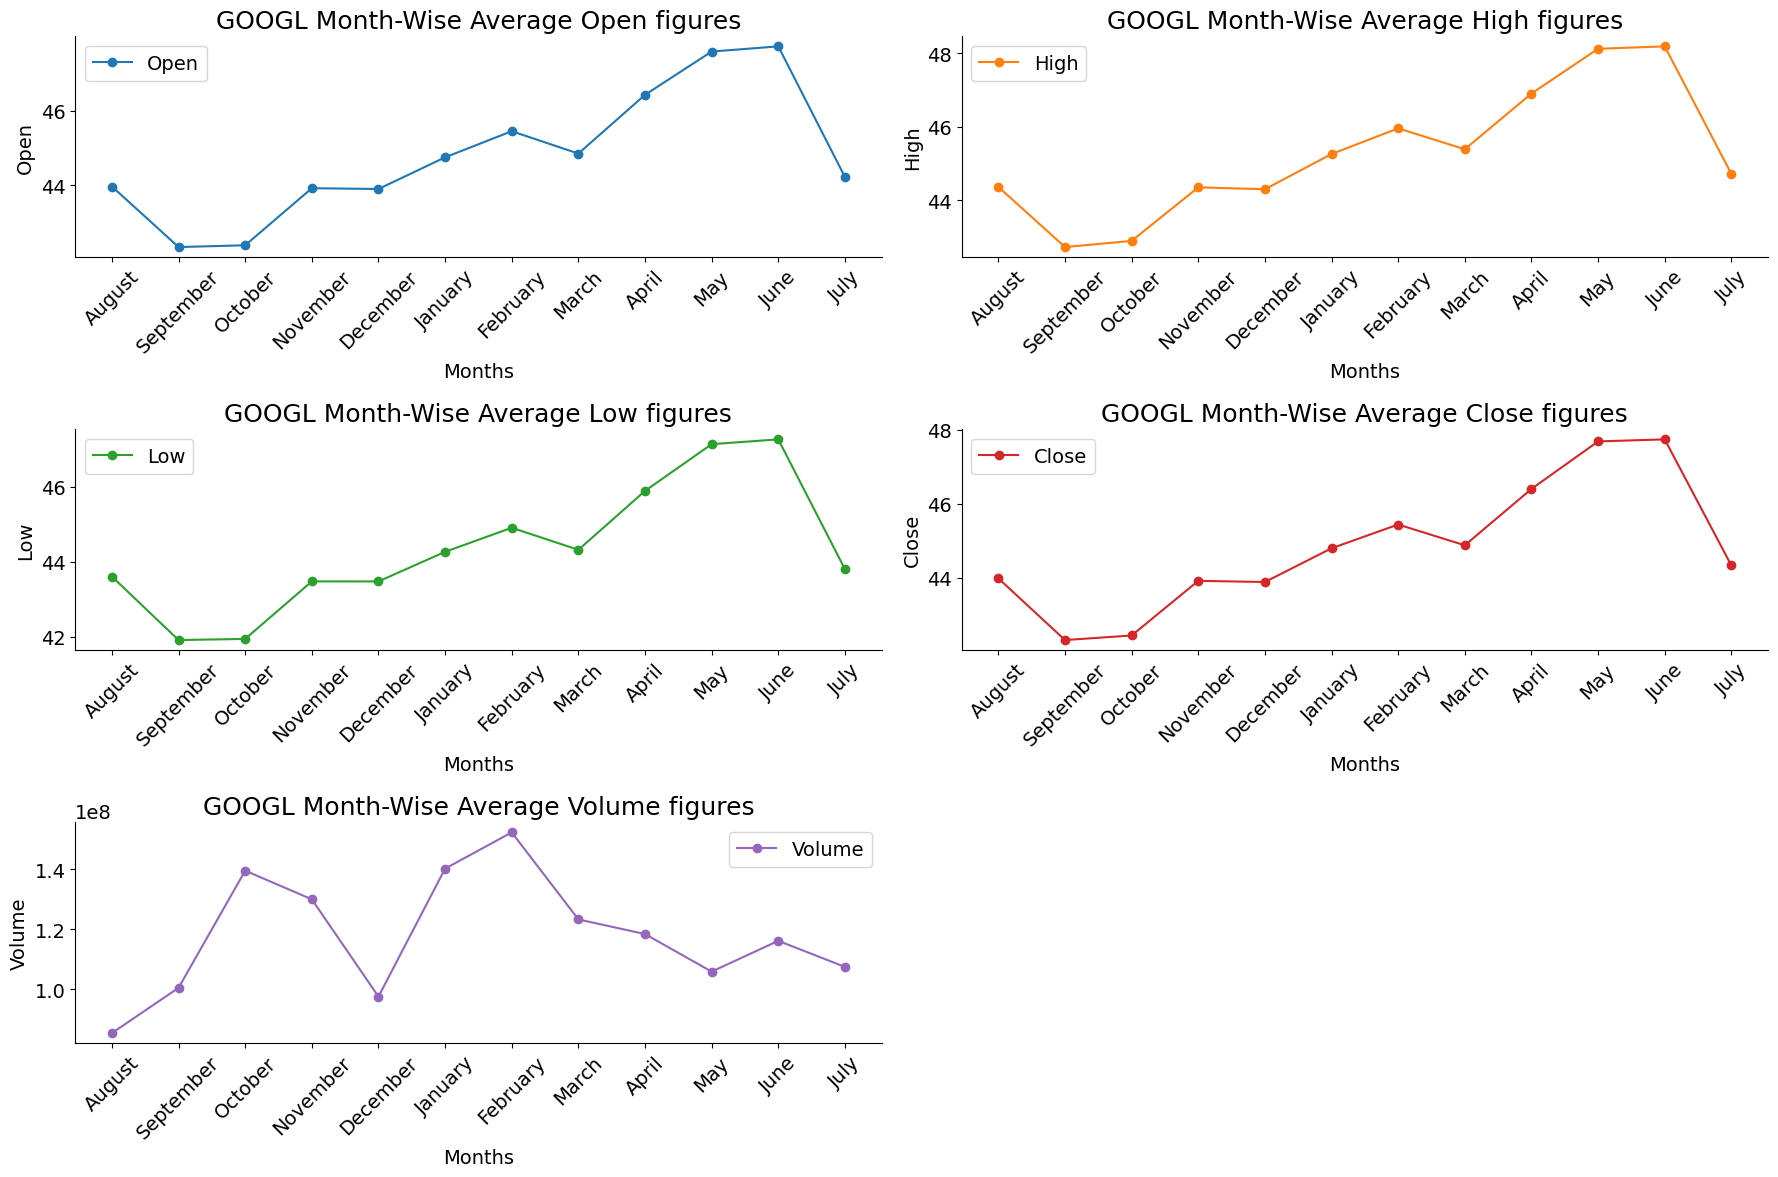

In [41]:
colors = plt.rcParams["axes.prop_cycle"]()
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot df

#Set the figure size of the plot
fig = plt.figure(figsize=(18,12))

n = len(df.groupby(df['Date'].dt.month_name(), sort=False).mean().columns[1:-2])

#Loop through the each column in the dataframe to generate a subplot
for i in range(1,n+1):
    color = next(colors)["color"]
    #Generate a subplot with the given dimensions
    plt.subplot(a, b, c)
    #Plot the data in a line graph, with different colors for each line
    plt.plot(df.groupby(df['Date'].dt.month_name(), sort=False).mean().iloc[:, i], color= color, marker='o')
    #Remove the top and right borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #Rotate the x-tick labels by 45 degrees
    plt.xticks(rotation=45)
    #Set the title, x-axis label, y-axis label, and legend
    plt.title(f"{symbol} Month-Wise Average {df.groupby(df['Date'].dt.month_name(), sort=False).mean().iloc[:, i].name} figures", fontsize=18)
    plt.xlabel('Months')
    plt.ylabel(df.groupby(df['Date'].dt.month_name(), sort=False).mean().iloc[:, i].name)
    plt.legend([df.groupby(df['Date'].dt.month_name(), sort=False).mean().iloc[:, i].name])
    #Increment the subplot df
    c = c + 1

#Adjust the layout of the plot
plt.tight_layout()
#Show the plot
plt.show()

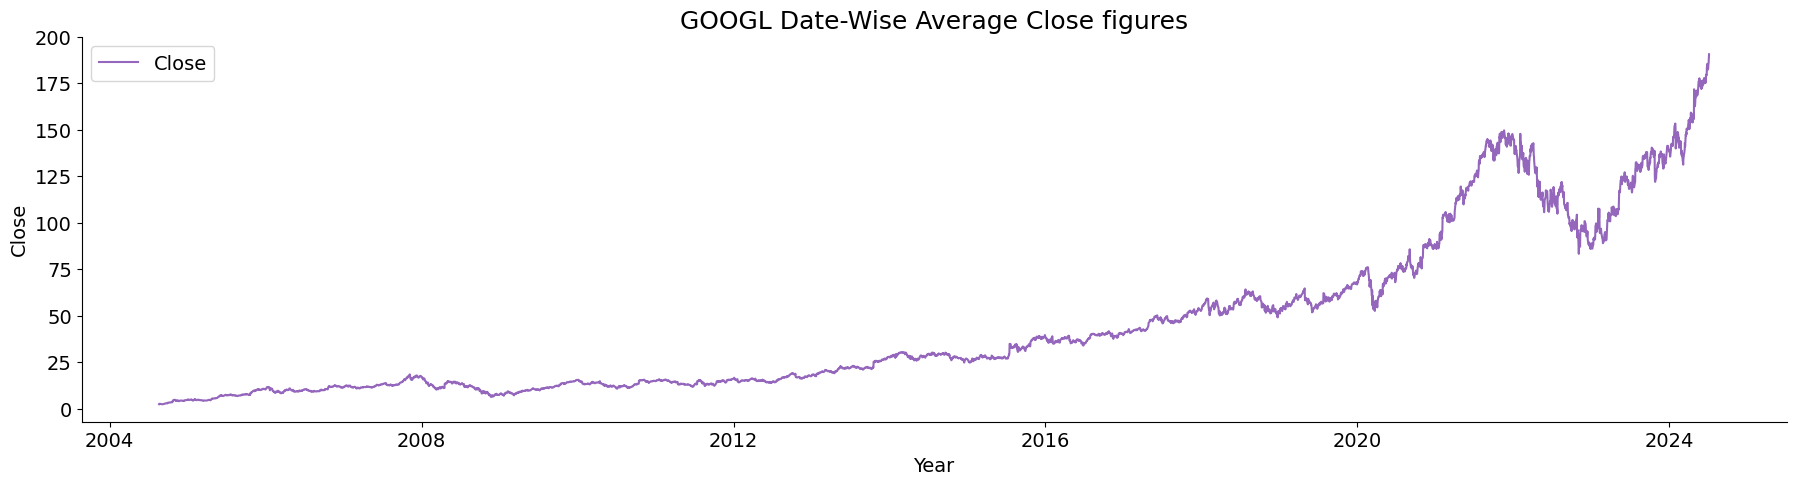

In [63]:
plt.plot(df.groupby(df['Date'], sort=False).mean().Close, color= next(colors)["color"])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#Rotate the x-tick labels by 45 degrees
plt.xticks(rotation=0)
#Set the title, x-axis label, y-axis label, and legend
plt.title(f"{symbol} Date-Wise Average Close figures", fontsize=18)
plt.xlabel('Year')
plt.ylabel('Close')
plt.legend(['Close'])
plt.show()

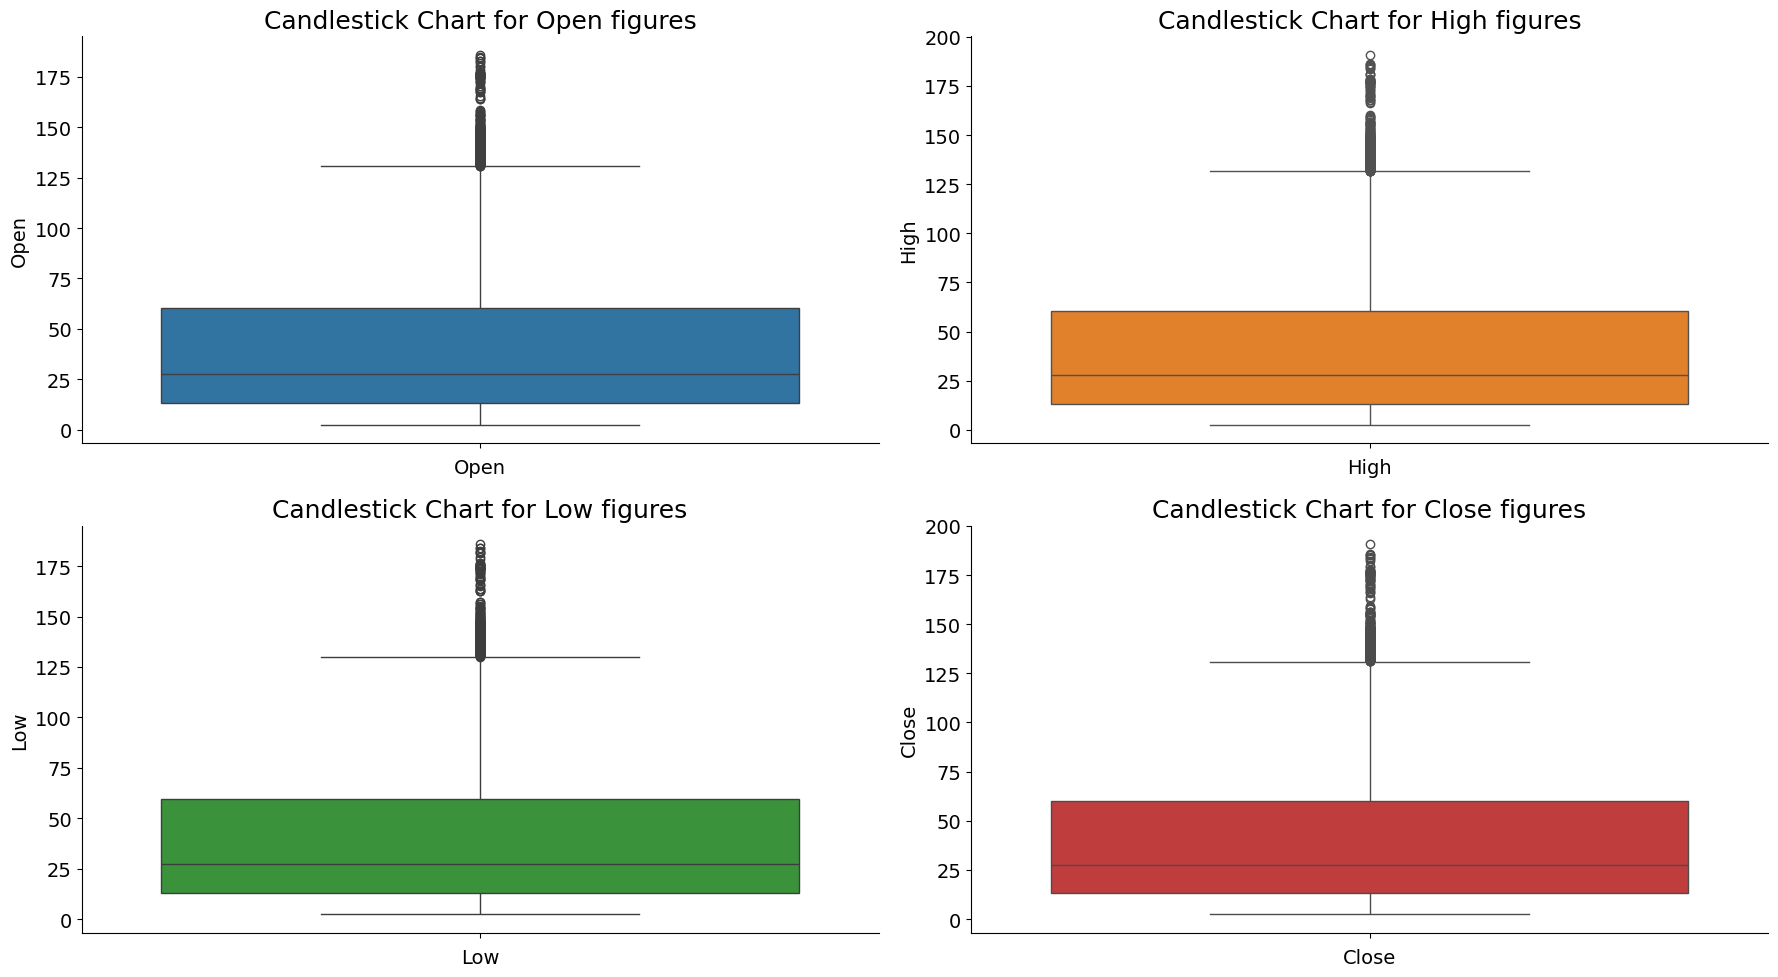

In [68]:
# This code plots boxplots of various columns in a dataframe, data_hist.

colors = plt.rcParams["axes.prop_cycle"]()

# The number of rows, columns, and the subplot counter are initialized. 
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

# A figure is initialized  
fig = plt.figure(figsize=(18,10))

length = range(1,len(df.columns[:-3]))

#loop is used to iterate over the columns of dataframe. 
for i in length:
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    #For each column, a boxplot is plotted and labels and titles are set accordingly. 
    sns.boxplot(df[df.columns[i]], color= color )
    # The spines of each plot are made invisible and the figure is adjusted and shown.
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #X Axis label is added
    plt.xlabel(df.columns[i])
    #title to the plot is added
    plt.title(f'Candlestick Chart for {df.columns[i]} figures', fontsize=18)
    c = c + 1

#Layout is tightended up
plt.tight_layout()

#plot is displayed
plt.show()

## ARMA 


### Auto-Regressive (AR)

- A Statistical model that tries to predict the values based on lagged values and the lag could be chosen as per the wish.

- The AR part of the model involves regressing the variable on its own lagged (past) values. The order of the AR part is denoted by `p`

- **For Example**: Sales of 9th month could be predicted based on 7th and 8th Month.


The AR part of the model is calculated by the below formula:-

**Formula:**
$$ X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \phi_3 X_{t-3} + \cdots + \phi_p X_{t-p} + \epsilon_t $$

Where:
- $ X_t $ is the value of the series at time $ t $.
- $ c $ is the constant term (intercept).
- $ \phi_i $ (for $ i = 1, 2, \ldots, p $) are the coefficients (calculated using OLS method) of the lagged values.
- $ X_{t-i} $ are the lagged values of the series.
- $ \epsilon_t $ is the error term (white noise) at time $ t $.


For example, for an AR(2) model (where $ p = 2 $), the equation would be:

$ X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \epsilon_t $

This explicitly shows that $ X_t $ depends on the two most recent past values of the series, $ X_{t-1} $ and $ X_{t-2} $. Similarly, for an AR(n) model (where p = infinity ), the equation would be:

$ X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + ..... + \phi_n X_{t-n}\epsilon_t $

In [75]:
#shifting the data by 1 and 2 rows, shifting would mean pushing the data n rows forward
df['Close_Lag_1'], df['Close_Lag_2'] = df['Close'].shift(1), df['Close'].shift(2)

In [71]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_Lag_1,Close_Lag_2
0,2004-08-19,2.499634,2.601119,2.398648,2.508132,893181924,0.0,0.0,NaN,NaN
1,2004-08-20,2.524880,2.726600,2.512132,2.707353,456686856,0.0,0.0,2.508132,NaN
2,2004-08-23,2.768345,2.836584,2.725851,2.734599,365122512,0.0,0.0,2.707353,2.508132
3,2004-08-24,2.780593,2.789591,2.588871,2.621365,304946748,0.0,0.0,2.734599,2.707353
4,2004-08-25,2.623616,2.699605,2.596620,2.649612,183772044,0.0,0.0,2.621365,2.734599


In [76]:
df.dropna(inplace=True)

In [77]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_Lag_1,Close_Lag_2
2,2004-08-23,2.768345,2.836584,2.725851,2.734599,365122512,0.0,0.0,2.707353,2.508132
3,2004-08-24,2.780593,2.789591,2.588871,2.621365,304946748,0.0,0.0,2.734599,2.707353
4,2004-08-25,2.623616,2.699605,2.596620,2.649612,183772044,0.0,0.0,2.621365,2.734599
5,2004-08-26,2.623365,2.698354,2.616117,2.697354,141897960,0.0,0.0,2.649612,2.621365
6,2004-08-27,2.702104,2.715102,2.641863,2.653361,124235640,0.0,0.0,2.697354,2.649612


In [91]:
df_lagged = df[['Close','Close_Lag_1', 'Close_Lag_2']]

X = df_lagged[['Close_Lag_1', 'Close_Lag_2']]
X['Intercept'] = 1
y = df_lagged['Close']

# Use numpy's least squares to estimate parameters
params = np.linalg.lstsq(X, y, rcond=None)[0]
phi_1, phi_2, c = params[0], params[1], params[2]

print(f"Estimated parameters: c = {c:.4f}, phi_1 = {phi_1:.4f}, phi_2 = {phi_2:.4f}")

# Step 4: Predict future values
def predict_ar2(X_t_minus_1, X_t_minus_2, c, phi_1, phi_2):
    return c + phi_1 * X_t_minus_1 + phi_2 * X_t_minus_2

# Predict the next value in the series
X_t_minus_1 = df['Close'].iloc[-3]
X_t_minus_2 = df['Close'].iloc[-2]
X_t_pred = predict_ar2(X_t_minus_1, X_t_minus_2, c, phi_1, phi_2)

print(f"Predicted next value: X_t_pred = {X_t_pred:.4f}")

Estimated parameters: c = 0.0035, phi_1 = 0.9467, phi_2 = 0.0541
Predicted next value: X_t_pred = 185.4242


In [93]:
#Coefficient for lags (first 2, third is constant term) calculated using ordinary least squares implemented in Numpy
params

array([0.94666052, 0.05414538, 0.00346032])

### Does Changing the Lag Order in the AR Model affect the results?

Yes, changing the order of the lags in the autoregressive model equation will impact the final result. This is because the coefficients $ \phi_i $ in an AR model are specifically tied to particular lagged values of the time series, representing their respective influences on the current value $ X_t $.

In an AR(p) model, each coefficient $ \phi_i $ is associated with a specific lag. The model captures the relationship between $ X_t $ and its past values:

$$ X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + \epsilon_t $$

If you change the order of the lags, such as $ X_t = c + \phi_1 X_{t-2} + \phi_2 X_{t-3} + \phi_3 X_{t-1} + \cdots + \phi_p X_{t-p} + \epsilon_t $ you are altering which lagged value is associated with which coefficient. This means:

1. **Different Relationships**: The model will now capture different relationships between $ X_t $ and its past values. For example, $ \phi_1 $ will now be the coefficient for $ X_{t-2} $ instead of $ X_{t-1} $.
2. **Estimation Changes**: When you estimate the parameters using a method like ordinary least squares, the estimated coefficients will change because the input data (lagged values) for each coefficient has changed.
3. **Prediction Impact**: The predictive capability of the model will be different because the model is now using different past values to make predictions about the future.